In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [133]:
#Read data 
track_data = pd.read_excel("ariane_tracks_booster_container_2.0.xlsx")
planning_data = pd.read_excel("a6_booster_delivery_planning.xlsx")

In [134]:
track_data

,Container,Zone,Entry,Exit,FM
0,SN6,A,09.12.2020,24.12.2020,1
1,SN6,B,24.12.2020,29.12.2020,1
2,SN6,C,29.12.2020,30.12.2020,1
3,SN6,D,10.01.2021,12.01.2021,1
4,SN6,E,12.01.2021,27.01.2021,1
...,...,...,...,...,...
348,SN3,D,16.04.2024,18.04.2024,16
349,SN3,C,01.05.2024,02.05.2024,16
350,SN3,B,02.05.2024,07.05.2024,16
351,SN5,A,19.02.2024,05.03.2024,16


In [135]:
planning_data.head()

,Date,Config
0,2021-01-12,2
1,2021-08-24,4
2,2021-10-19,2
3,2022-01-28,2
4,2022-06-21,4


In [136]:
important=track_data.drop(columns=['Container','Exit','FM'])
important=important[important['Zone']=='E']


In [137]:
unique_df = important.drop_duplicates(subset=['Entry']).reset_index()
unique_df=unique_df.drop(columns='index')
unique_df

,Zone,Entry
0,E,12.01.2021
1,E,24.08.2021
2,E,19.10.2021
3,E,28.01.2022
4,E,21.06.2022
5,E,29.10.2022
6,E,11.12.2022
7,E,27.02.2023
8,E,17.05.2023
9,E,05.07.2023


In [138]:
used_orders=planning_data[:max(track_data['FM'])]
used_orders

,Date,Config
0,2021-01-12,2
1,2021-08-24,4
2,2021-10-19,2
3,2022-01-28,2
4,2022-06-21,4
5,2022-10-29,4
6,2022-11-20,2
7,2023-02-27,2
8,2023-05-17,4
9,2023-07-05,2


In [139]:
pd.to_datetime(unique_df['Entry'], format='%d.%m.%Y')

0    2021-01-12
1    2021-08-24
2    2021-10-19
3    2022-01-28
4    2022-06-21
5    2022-10-29
6    2022-12-11
7    2023-02-27
8    2023-05-17
9    2023-07-05
10   2023-08-23
11   2023-10-06
12   2023-11-18
13   2024-01-02
14   2024-02-16
15   2024-04-01
Name: Entry, dtype: datetime64[ns]

In [140]:
lateness=pd.to_datetime(used_orders['Date'])-pd.to_datetime(unique_df['Entry'], format='%d.%m.%Y')
lateness

0      0 days
1      0 days
2      0 days
3      0 days
4      0 days
5      0 days
6    -21 days
7      0 days
8      0 days
9      0 days
10     0 days
11   -12 days
12   -21 days
13   -18 days
14   -31 days
15    -9 days
dtype: timedelta64[ns]

In [141]:
days = lateness.dt.days


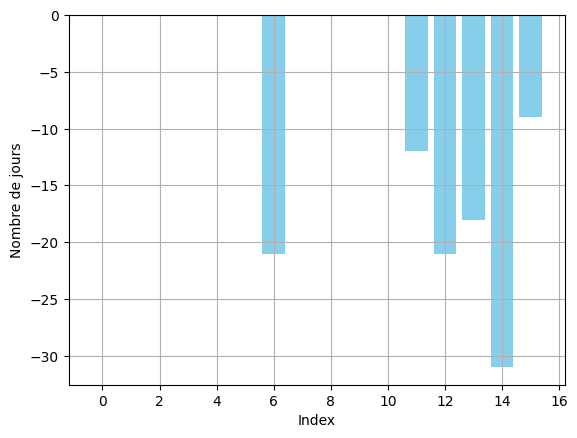

In [142]:
# Obtenir les index
index = list(lateness.keys())

# Créer le graphique en barres
plt.bar(index, days, color='skyblue')
plt.xlabel('Index')
plt.ylabel('Nombre de jours')
plt.grid(True)
plt.show()